<img src='https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/tools/frameworks/-/raw/main/img/Standard_banner.png' align='right' width='100%'/>

<a href="../../../../Index.ipynb"><< Index</a>
<br>
<a href="./Atlantic_Med_SST_anomalies_2023.ipynb" target="_blank"><< Sea surface temperature anomalies in the Northern Atlantic and Mediterranean Sea in 2023</a>

<font color="#138D75">**Copernicus Marine Training Service**</font> <br>
**Copyright:** 2023 EUMETSAT <br>
**License:** MIT <br>
**Authors:** Ben Loveday (EUMETSAT/Innoflair UG), Hayley Evers-King (EUMETSAT)

<html>
  <div style="width:100%">
    <div style="float:left"><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.eumetsat.int%2Feumetlab%2Foceans%2Focean-training%2Fapplications%2ocean-case-studies/HEAD?urlpath=%2Ftree%2FCase_studies%2FOcean_phenomena%2FBasin_scale_variability%2FAtlantic_Med_SST_anomalies_MHW_2023%2FMed_MHW_2023.ipynb"><img src="https://mybinder.org/badge_logo.svg" alt="Open in Binder"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div>
  <div style="width:100%">
    <div style="float:left"><a href="https://jupyterhub-wekeo.apps.eumetsat.dpi.wekeo.eu/hub/user-redirect/lab/tree/public/wekeo4oceans/ocean-case-studies/Case_studies/Ocean_phenomena/Basin_scale_variability/Atlantic_Med_SST_anomalies_MHW_2023/Med_MHW_2023.ipynb"><img src="https://img.shields.io/badge/launch-WEKEO-1a4696.svg?style=flat&logo=" alt="Open in WEkEO"></a></div>
    <div style="float:left"><p>&emsp;</p></div>
  </div> 
</html>

<div class="alert alert-block alert-success">
<h3>Ocean case studies</h3></div>

<div class="alert alert-block alert-warning">
    
<b>PREREQUISITES </b>

This notebook has the following ntoebook prerequisites:
- **<a href="./Atlantic_Med_SST_anomalies_2023.ipynb" target="_blank">Sea surface temperature anomalies in the Northern Atlantic and Mediterranean Sea in 2023</a>** will download the data you require to run this notebook.
    
</div>
<hr>

# Marine heatwaves in the Mediterranean Sea in 2023

### Data used

| Product Description | Data Store collection ID| Product Navigator | WEkEO HDA ID | WEkEO metadata |
|:--------------------:|:-----------------------:|:-------------:|:-----------------:|:-----------------:|
| Global OSTIA SST (Reprocessed) | - | - | EO:MO:DAT:SST_GLO_SST_L4_REP_OBSERVATIONS_010_011 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_REP_OBSERVATIONS_010_011" target="_blank">link</a> |
| Global OSTIA SST (Near real-time) | - | - | EO:MO:DAT:SST_GLO_SST_L4_NRT_OBSERVATIONS_010_001 | <a href="https://www.wekeo.eu/data?view=dataset&dataset=EO%3AMO%3ADAT%3ASST_GLO_SST_L4_NRT_OBSERVATIONS_010_001" target="_blank">link</a> |

### Learning outcomes

At the end of this notebook you will know how to;
* use time series of satellite SST data to investigate marine heatwaves

### Outline

Concurrent with the past century's persistent warming of global oceans, marine heatwaves (periods of extreme regional ocean warming) have become more frequent and more extreme (<a href="https://www.science.org/doi/10.1126/science.aba0690" target="_blank">Laufkötter et al., 2020</a>, IPCC AR6, IPCC SR on ocean and cryosphere). They occur in many areas around the world, from the Pacific Ocean to the Atlantic Ocean to the Mediterranean Sea (<a href="https://egusphere.copernicus.org/preprints/2022/egusphere-2022-1119/" target="_blank">Guinaldo et al., 2022)</a>). Marine heatwaves can occur over thousands to millions of square kilometres, can persist for weeks to months, and can occur over significant depth. 

Marine heatwaves are generally defined as as period of abnormally high ocean temperatures, relative to a regional and seasonal average determined over time. The exact statistical methodology used, can vary, depending on the relation between the extreme heat  and the impact of interest. 

<figure>
  <img src='../../../../img/Hobday_MHW.png' width='50%'/>
  <figcaption>Figure 1: Marine heat wave characterisations (Credit: <a href="https://www.researchgate.net/publication/325504331_Categorizing_and_Naming_Marine_Heatwaves" target="_blank">Hobday et al., 2018</a>)</figcaption>
</figure>

Impacts of marine heatwaves include:
* Impact on air-sea flux of CO2
* Tropical cyclone formation
* Coral bleaching (<a href="https://www.mdpi.com/2072-4292/12/23/3856" target="_blank">Skirving et al., 2020</a>)
* Mammal and sea bird mortality
* Harmful Algal Blooms
* Spatiotemporal shifts in habitats (affecting fisheries).

A thorough review of biological impacts of marine heatwaves can be found in <a href="https://www.annualreviews.org/doi/full/10.1146/annurev-marine-032122-121437" target="_blank">Smith et al. (2023)</a>.

In this notebook we will use the marine heatwave toolkit developed by <a href="https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057b" target="_blank">Hobday et al., 2016</a>, to identify marine heatwaves in the Mediterranean Sea.

<div class="alert alert-info" role="alert">

## <a id='TOC_TOP'></a>Contents

</div>

 1. [Setting notebook parameters](#section1)
 1. [Gathering our SST files](#section2)
 1. [Loading the data and calculating climatologies](#section3)
 1. [Identifying heatwaves](#section4)
 1. [Conclusions](#section5)

<hr>

We begin by importing all of the libraries that we need to run this notebook. If you have built your python using the environment file provided in this repository, then you should have everything you need. For more information on building environment, please see the repository **<a href="../../../../README.md" target="_blank">README</a>**. The key library, `xmhw`, allows us to calculate marine heatwaves based on **<a href="https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057b" target="_blank">Hobday et al., 2016</a>**. For more information on this package, please see the **<a href="https://github.com/coecms/xmhw" target="_blank">xmhw</a>** GitHub pages.

In [1]:
import xarray as xr                     # a powerful library that helps us work efficiently with multi-dimensional arrays
import os                               # a library that allows us access to basic operating system commands
import glob                             # a package that helps with file searching
import matplotlib.pyplot as plt         # a library the provides plotting capability
from matplotlib import gridspec         # a library the provides plotting capability
import numpy as np                      # a library that lets us work with arrays; we import this with a new name "np"
import datetime                         # a library that allows us to work with dates and times
import pandas as pd                     # a library for time series analysis
import warnings                         # a library the helps us to manage warnings
from xmhw.xmhw import detect, threshold # a library that support Xarray calculation of marine heatwaves, based on Hobday et al. 2016 <<<

# turn off warnings
warnings.filterwarnings("ignore")

<div class="alert alert-info" role="alert">

## <a id='section1'></a>1. Setting notebook parameters
[Back to top](#TOC-TOP)

</div>

To start, lets define a few parameters that will determine how we run our Jupyter Notebook. We will begin by defining the directory where our time series is stored. If you don't have a time series of data, you should look at the previous notebook, **<a href="../../Atlantic_Med_SST_anomalies_2023.ipynb" target="_blank">Sea surface temperature anomalies in the Northern Atlantic and Mediterranean Sea in 2023</a>**, which will acquire some for you.

We are going to look at two times series; one derived from Copernicus Marine Service (CMEMS) multi-year ("my") **reprocessed** products, and one from near real-time ("nrt") **operational** products. Below we define the tags used to reference the data. We are going to look at three experiments;
* defining heatwaves using the **maximum** length of record to define the climatology in each case
* defining heatwaves using the **common** period of our data (2007 - 2020)
* defining heatwaves using the most **recent** years of our data from 2007 onwards

We will set date bounds to match these three experiments, as well as dates for plotting.

In [2]:
download_dir = os.path.join(os.getcwd(), "products")
tags = ["NRT", "MY"]

# data selections years
experiments = ["max", "common", "recent"]
start_years = {"MY" : [1982, 2007, 2007], "NRT": [1982, 2007, 2007]}
end_years = {"MY" : [2021, 2020, 2020], "NRT": [2023, 2020, 2023]}

# plot history
plot_start_year = [2018, 2018, 2018]
plot_end_year = [2023, 2023, 2023]

<div class="alert alert-info" role="alert">

## <a id='section2'></a>2. Gathering our SST data files
[Back to top](#TOC-TOP)

</div>

Now we have set out parameters, we will load our data into a two `xarray` DataArrays, which we will store in a single dictionary called `heatwaves`.

In [3]:
heatwaves = {}
for tag in tags:
    print(f'Loading {tag} data')
    heatwaves[tag] = {}
    TS_files = glob.glob(os.path.join(download_dir,f"TS_*_{tag}.nc"))
    DS = xr.open_mfdataset(TS_files)
    DS["DoY"]=(["time"], np.array(DS.time.dt.dayofyear)-1)
    heatwaves[tag][f"dataset"] = DS

Loading NRT data
Loading MY data


<div class="alert alert-info" role="alert">

## <a id='section3'></a>3. Loading the data and calculating climatologies
[Back to top](#TOC-TOP)

</div>

Our data is not loaded into a Python "dictionary" called heatwaves. We can explore the dictionary like so;

In [4]:
heatwaves

{'NRT': {'dataset': <xarray.Dataset>
  Dimensions:       (time: 5844)
  Coordinates:
    * time          (time) datetime64[ns] 2007-07-18T12:00:00 ... 2023-07-17T12...
  Data variables:
      analysed_sst  (time) float32 dask.array<chunksize=(366,), meta=np.ndarray>
      DoY           (time) int64 198 199 200 201 202 203 ... 193 194 195 196 197},
 'MY': {'dataset': <xarray.Dataset>
  Dimensions:       (time: 14245)
  Coordinates:
    * time          (time) datetime64[ns] 1982-07-18T12:00:00 ... 2021-07-17T12...
  Data variables:
      analysed_sst  (time) float32 dask.array<chunksize=(365,), meta=np.ndarray>
      DoY           (time) int64 198 199 200 201 202 203 ... 193 194 195 196 197}}

Now we have our data loaded, lets extract SST time series for both the operational and reprocessed products and calculate climatologies and "thresholds" for both. The thresholds, defined the level above the climatology the SST signal must reach to to be considered a heatwave.

In [5]:
for tag in tags:
    for start_year, end_year, experiment in zip(start_years[tag], end_years[tag], experiments):
        heatwaves[tag][experiment] = {}
        heatwaves[tag][experiment]["SST_time_series"] = heatwaves[tag][f"dataset"]["analysed_sst"].sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31')) - 273.15
        heatwaves[tag][experiment]["DoY"] = heatwaves[tag][f"dataset"]["DoY"].sel(time=slice(f'{start_year}-01-01', f'{end_year}-12-31'))
        heatwaves[tag][experiment]["clim"] = threshold(heatwaves[tag][experiment]["SST_time_series"])
        heatwaves[tag][experiment]["max_year"] = np.array(heatwaves[tag][experiment]["SST_time_series"][-1].time.dt.year)
        heatwaves[tag][experiment]["min_year"] = np.array(heatwaves[tag][experiment]["SST_time_series"][0].time.dt.year)

Lets now plot our climatologies and thresholds...

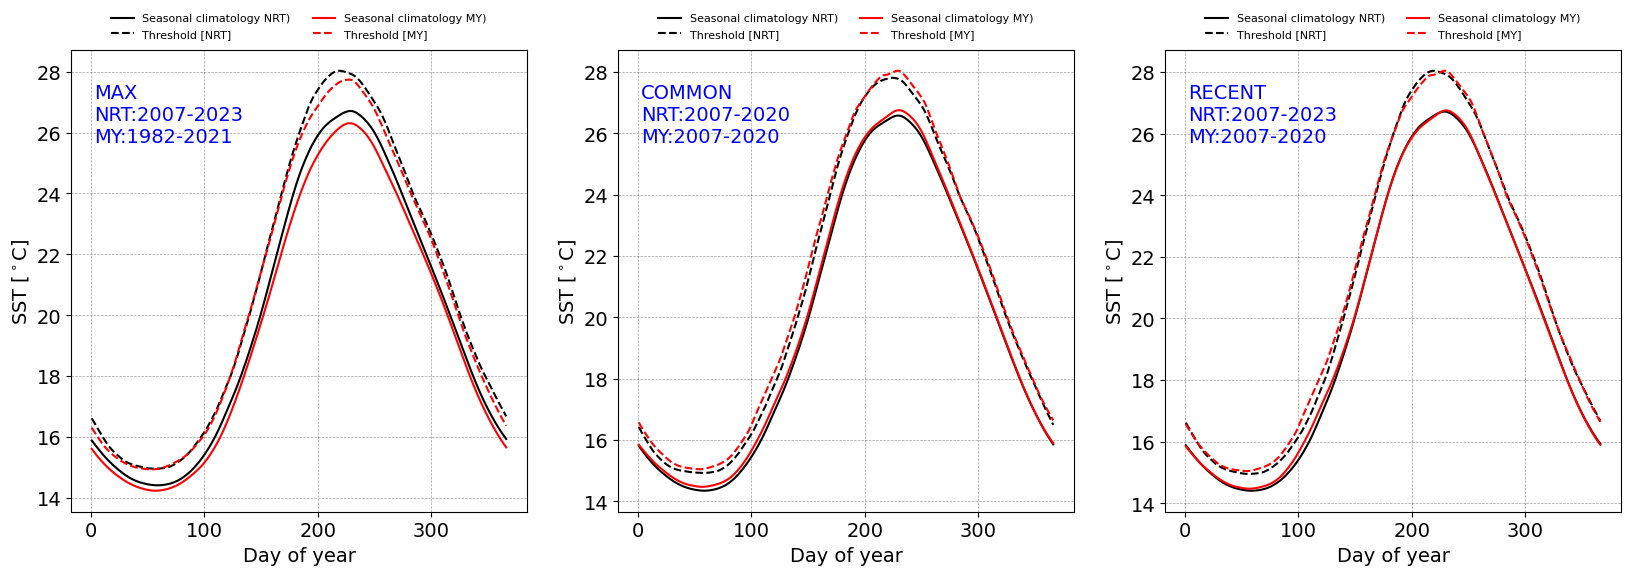

In [6]:
plt.figure(figsize=(20, 6))
plt.rc('font', size=14)
gs = gridspec.GridSpec(1, 3)

for experiment, plot_number in zip(experiments, range(3)):
    axes = plt.subplot(gs[0, plot_number])
    plots = [] ; labels = []; annot = experiment.upper()
    for tag, plot_col in zip(tags, ["k", "r"]):
        DS = heatwaves[tag][experiment]
        p1, = axes.plot(DS["clim"].doy, DS["clim"].seas, c=plot_col)
        p2, = axes.plot(DS["clim"].doy, DS["clim"].thresh, c=plot_col, linestyle='--')
        plots.append([p1, p2])
        labels.append([f"Seasonal climatology {tag})", f"Threshold [{tag}]"])
        annot = annot + "\n" + f"{tag}:{DS['min_year']}-{DS['max_year']}"
    plt.grid(color='0.25', linestyle='--', linewidth=0.5, alpha=0.5)
    plt.legend([item for sublist in plots for item in sublist], [item for sublist in labels for item in sublist],
               frameon=False, bbox_to_anchor=(0.5, 1.10), loc='upper center', ncol=2, fontsize=8)
    plt.annotate(annot, (0.05, 0.8), xycoords="axes fraction", color='b')
    plt.xlabel(r'Day of year')
    plt.ylabel(r'SST [$^\circ$C]')
plt.show()

Unsurpisingly, we can see that our climatology and thresholds differ significantly the **max** case. However, there are also small, but noticeable differences in the common case, which can be attributed to the differences in processing in between the operational and reprocessed data. Extending the operational climatology in the **recent** case exacerbates these differences, pushing the climatology and threshold upwards, clearly showing the effects of warming in the recent 3 years.

<div class="alert alert-info" role="alert">

## <a id='section4'></a>4. Identifying heatwaves
[Back to top](#TOC-TOP)

</div>

Now lets calculate our heatwaves based on our three experiments...

In [7]:
for tag in tags:
    for experiment in experiments:
        heatwaves[tag][experiment]["mhws"] = detect(heatwaves[tag][experiment]["SST_time_series"],
                                                    heatwaves[tag][experiment]["clim"]["thresh"],
                                                    heatwaves[tag][experiment]["clim"]["seas"])

How many heatwaves do we have in each case?

In [8]:
for experiment in experiments:
    for tag in tags:
        heatwaves[tag][experiment]["n_events"] = len(heatwaves[tag][experiment]["mhws"]["event"])
        print(f'Number of heatwaves ({tag} / {experiment}): {heatwaves[tag][experiment]["n_events"]}')

Number of heatwaves (NRT / max): 29
Number of heatwaves (MY / max): 79
Number of heatwaves (NRT / common): 29
Number of heatwaves (MY / common): 30
Number of heatwaves (NRT / recent): 29
Number of heatwaves (MY / recent): 30


Already here, we can start to see differences.
* In the **max** case, this is expected due to the differences in the time period used.
* However, in the common period, we identify one more heatwave in the **reprocessed** data than we do in the **operational** data.
* Comparing the **NRT / common** and **NRT / recent** experiments shows that we have identified no new heatwaves in the period to date than in the 2007 to 2020 common period. Why would this be?!

Lets look at these heatwaves in more detail, plotting them in time.

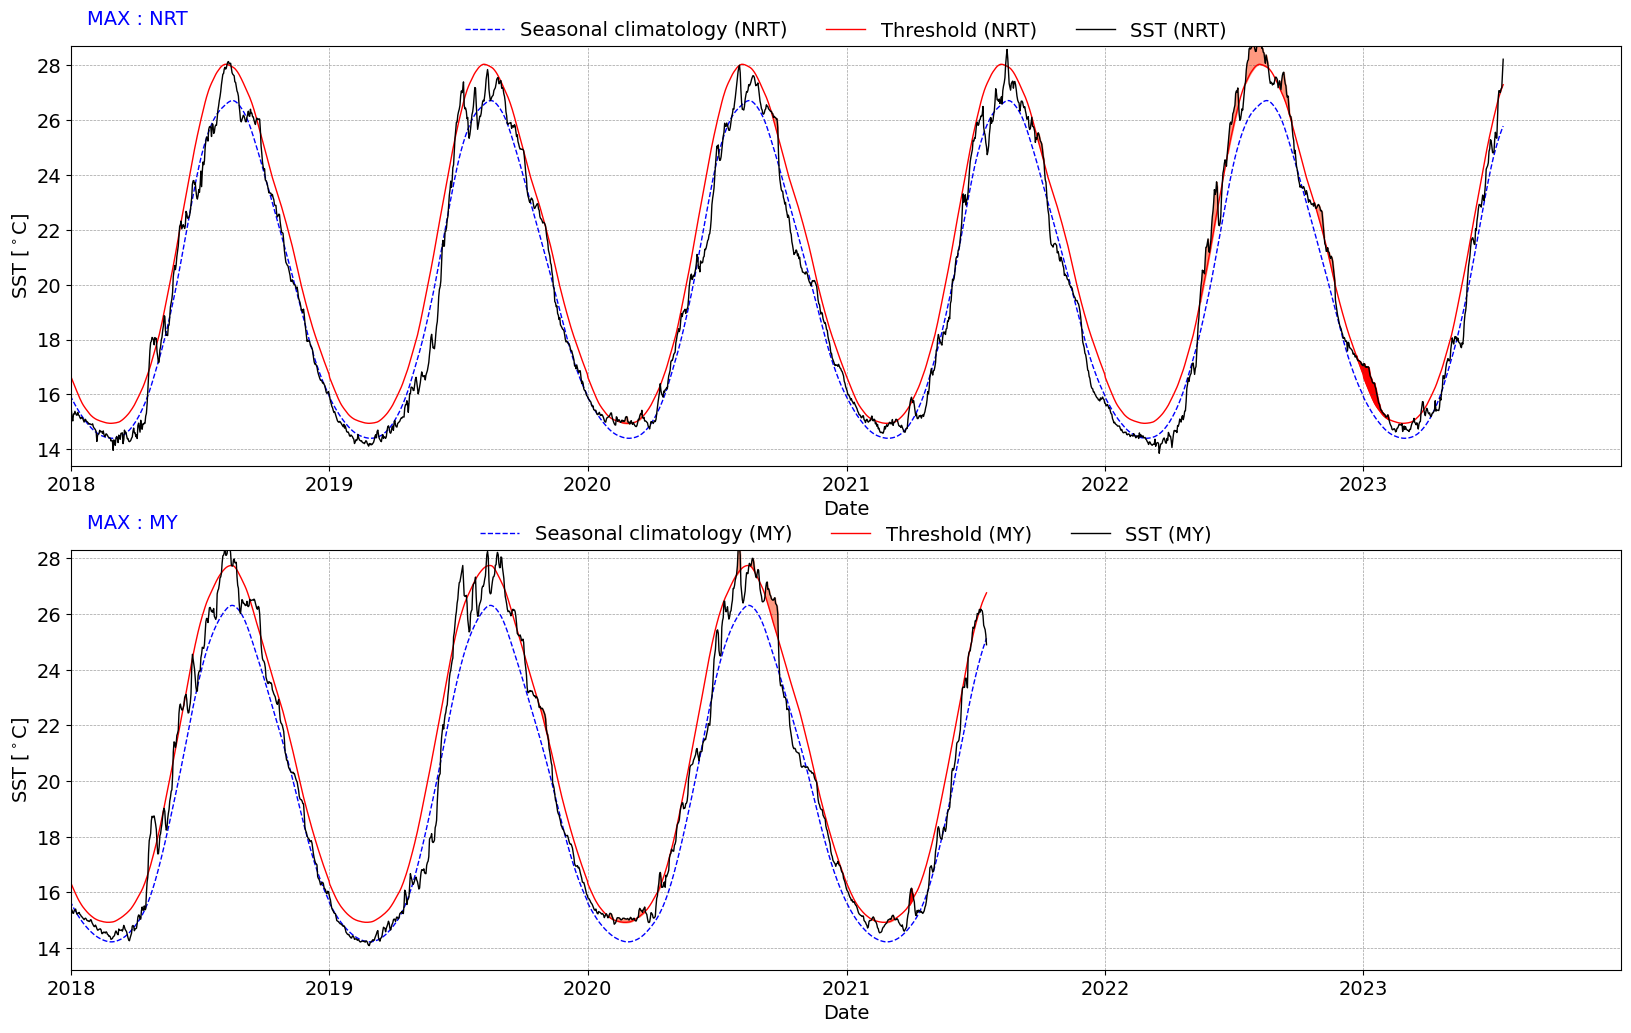

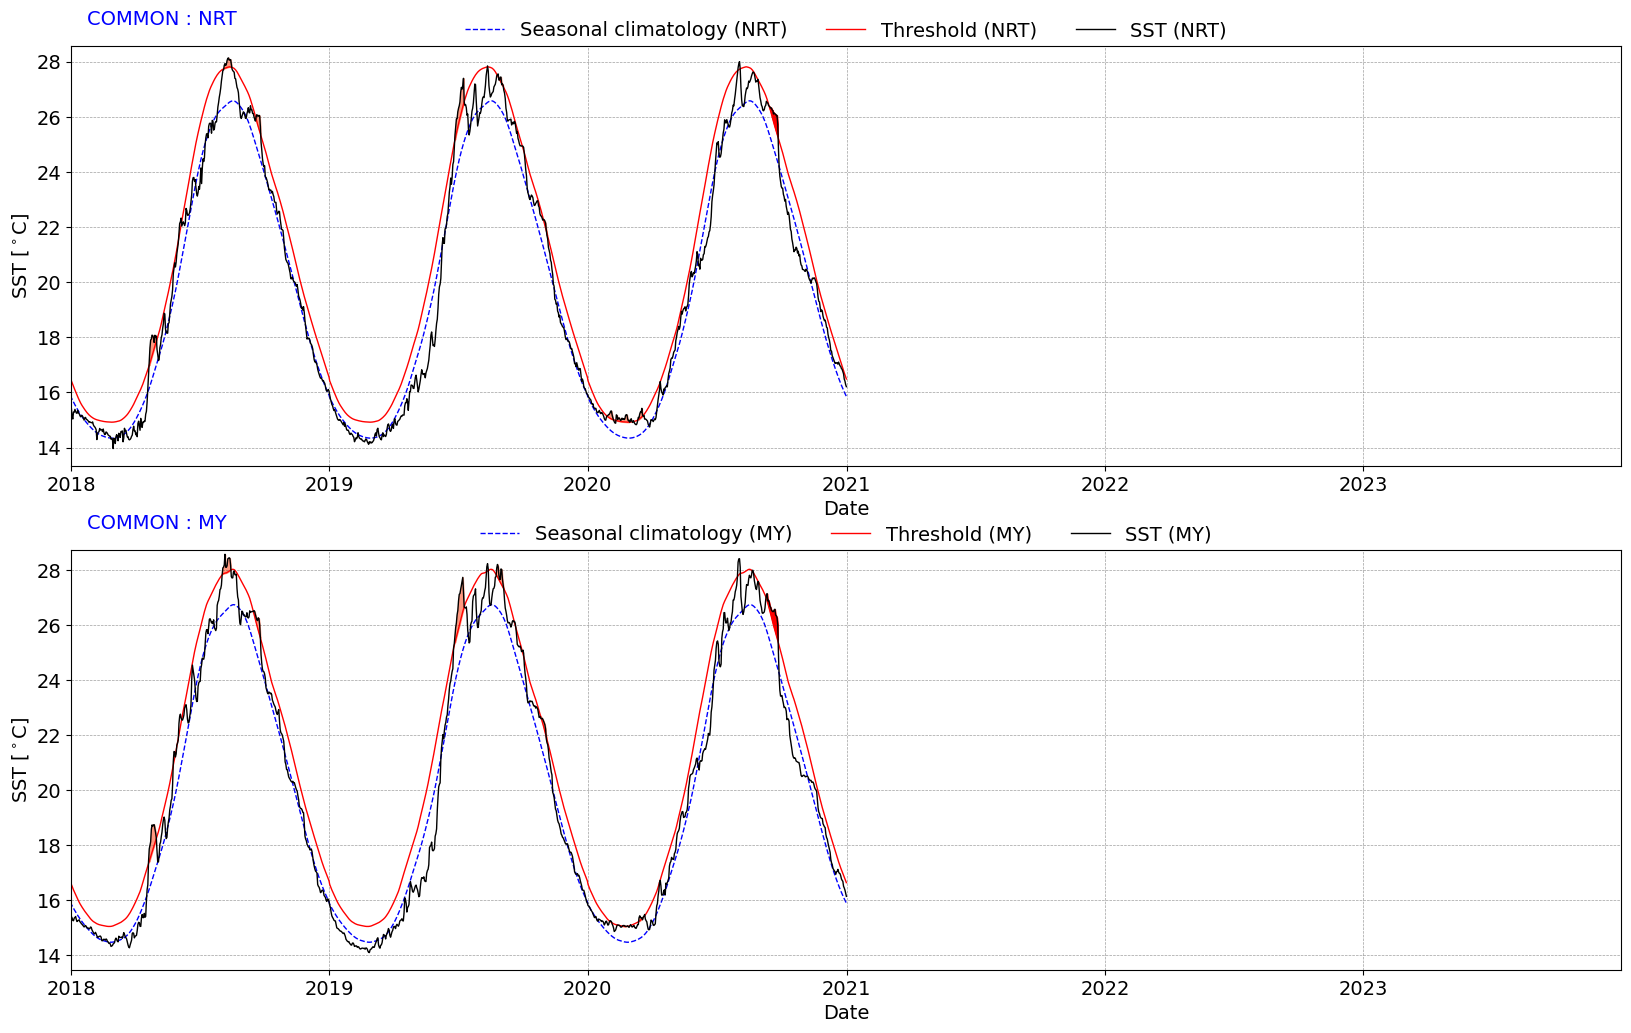

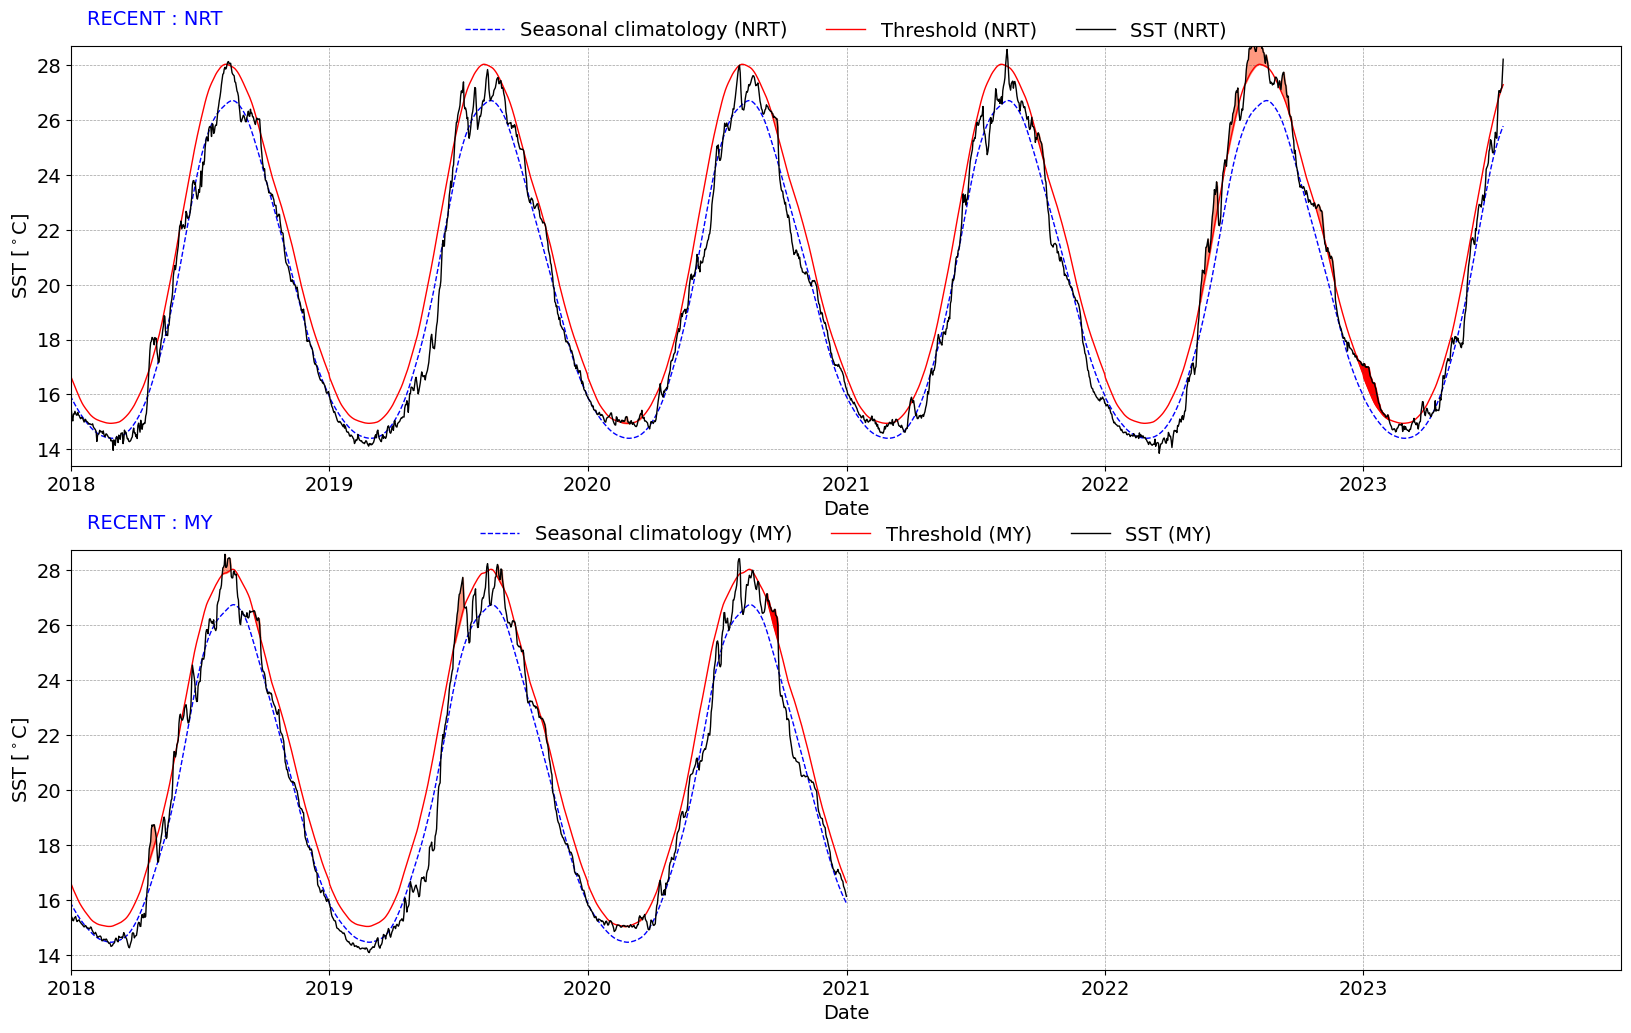

In [10]:
# highlight most recent!
ev = -1

for experiment, ii in zip(experiments, range(3)):
    plt.figure(figsize=(20, 12))
    plt.rc('font', size=14)
    gs = gridspec.GridSpec(2, 1)
        
    for tag, jj in zip(tags, range(2)):
        axes = plt.subplot(gs[jj, 0])    

        DS = heatwaves[tag][experiment]

        p1, = axes.plot(DS["SST_time_series"]["time"], DS["clim"]["seas"].values[DS["DoY"]], 'b--', linewidth=1, zorder=1)
        p2, = axes.plot(DS["SST_time_series"]["time"], DS["clim"]["thresh"].values[DS["DoY"]], 'r', linewidth=1, zorder=2)
        p3, = axes.plot(DS["SST_time_series"]["time"], DS["SST_time_series"], 'k', linewidth=1, zorder=3)
        
        # Find indices for previous MHW and shade
        for ev0 in np.arange(ev-10, min(ev+10, DS["n_events"]), 1):
            t1 = np.where(DS["SST_time_series"]["time"]==DS["mhws"]["time_start"][ev0].values)[0][0]
            t2 = np.where(DS["SST_time_series"]["time"]==DS["mhws"]["time_end"][ev0].values)[0][0]
            if ev0 == ev:
                plot_col = 'r'
            else:
                plot_col = (1,0.6,0.5)
            plt.fill_between(np.array(DS["SST_time_series"]["time"][t1:t2+1]),
                             DS["clim"]["thresh"].values[DS["DoY"]][t1:t2+1],
                             np.array(DS["SST_time_series"][t1:t2+1]), color=plot_col)
        
        plt.xlim(datetime.datetime(plot_start_year[ii], 1, 1), datetime.datetime(plot_end_year[ii], 12, 31))
        plt.ylim(DS["clim"]["seas"].min() - 1, DS["clim"]["seas"].max() + 2)
        plt.grid(color='0.25', linestyle='--', linewidth=0.5, alpha=0.5)
        plt.legend([p1, p2, p3],[f"Seasonal climatology ({tag})", f"Threshold ({tag})", f"SST ({tag})"],
                   frameon=False, bbox_to_anchor=(0.5, 1.1), loc='upper center', ncol=3)
        plt.xlabel(r'Date')
        plt.ylabel(r'SST [$^\circ$C]')
        plt.annotate(f"{experiment.upper()} : {tag.upper()}", (0.01, 1.05), xycoords="axes fraction", color='b')

    plt.show();
    plt.savefig(f'Marine_heat_waves_{experiment}.png', bbox_inches='tight');

<div class="alert alert-warning" role="alert">

## <a id='section5'></a>5. Conclusions
[Back to top](#TOC-TOP)

</div>

In this notebook we have employed the <a href="https://www.sciencedirect.com/science/article/abs/pii/S0079661116000057b" target="_blank">Hobday et al., 2016</a> method to identify heatwaves in the Mediterranean Sea. We have seen from our experiments, that identifying heatwaves depends quite critically on how we construct our climatology. It's source, length and "recentness" are all key considerations.

We show that 2022 showed a very strong heatwave in our region of interest, and that 2023 has already showed the presence of some heatwaves, with one continuing to develop now.

<hr>
<a href="../../../../Index.ipynb"><< Index</a>
<br>
<a href="./Atlantic_Med_SST_anomalies_2023.ipynb" target="_blank"><< Sea surface temperature anomalies in the Northern Atlantic and Mediterranean Sea in 2023</a>
<hr>
<a href="https://gitlab.eumetsat.int/eumetlab/oceans/ocean-training/applications/ocean-case-studies">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a> | <a href=mailto:ops@eumetsat.int>Contact helpdesk for support </a> | <a href=mailto:Copernicus.training@eumetsat.int>Contact our training team to collaborate on and reuse this material</a></span></p>